# _Multi-class_ output

Tot nu toe hebben we gezien hoe een {ref}`perceptron <target-perceptron>` met een sigmoïde activatiefunctie gebruikt kan worden voor binaire klassificatie. We zagen ook hoe {ref}`multi-layer perceptrons <target-mlp>` complexere beslissingsgrenzen kunnen leren door meerdere lagen van neuronen te combineren.

Maar wat als we meer dan twee klassen hebben? Bijvoorbeeld: het voorspellen van handgeschreven cijfers (0-9) of het herkennen van verschillende diersoorten in afbeeldingen?

## Softmax

Voor binaire klassificatie gebruiken we typisch één output neuron met een logistische activatiefunctie. De output van dat neuron ligt tussen 0 en 1. We interpreteren dit als een conditionele kans $P(y=1|\mathbf{x})$. Door een _decision boundary_ te kiezen, wordt de output $\hat{y}$ binair.  
  
Voor multi-class classificatie met $K$ klassen hebben we een andere aanpak nodig:
- we voorzien **$K$ output neuronen**: één voor elke klasse
- de waarde van elke output-neuron stelt opnieuw een conditionele kans voor: $P(y=k|\mathbf{x})$
- om een geldige kansverdeling te bekomen, moet de som van alle outputs moet 1 zijn

Dit is precies wat de **softmax activatiefunctie** doet.
(target-softmax)=
De softmax functie transformeert een vector van $K$ reële getallen naar een kansverdeling:

$$
\text{softmax}(\mathbf{z})_k = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$

De softmax activatiefunctie past dus de exponentiële functie toe op elk element $z_k$ en normaliseert vervolgens door te delen door de som van alle exponentiële waarden.

Hierdoor liggen alle outputs tussen 0 en 1, is de som van alle outputs exact 1 en krijgen hogere $z_k$ waarden hogere kansen. **De softmax is een generalisatie van de logistische activatiefunctie naar meerdere dimensies**
  
Gebruik:
- Voor een input $\mathbf{x}$ produceert het netwerk outputs (of _{ref}`logits <target-logits>`_) $\mathbf{z} = h(\mathbf{x}, \mathbf{W})$
- Na softmax activatie: $\text{softmax}(\mathbf{z})_k = P(y=k|\mathbf{x})$ voor elke klasse $k$
- Predictie: kies de klasse met de hoogste waarschijnlijkheid $\pmb{\hat{y}} = \arg\max \text{softmax}(\mathbf{z})_k$ (bv. $\pmb{\hat{y}} = \begin{bmatrix}0 & 1 & 0 & 0\end{bmatrix}^T$ bij $K=4$)

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrowPatch

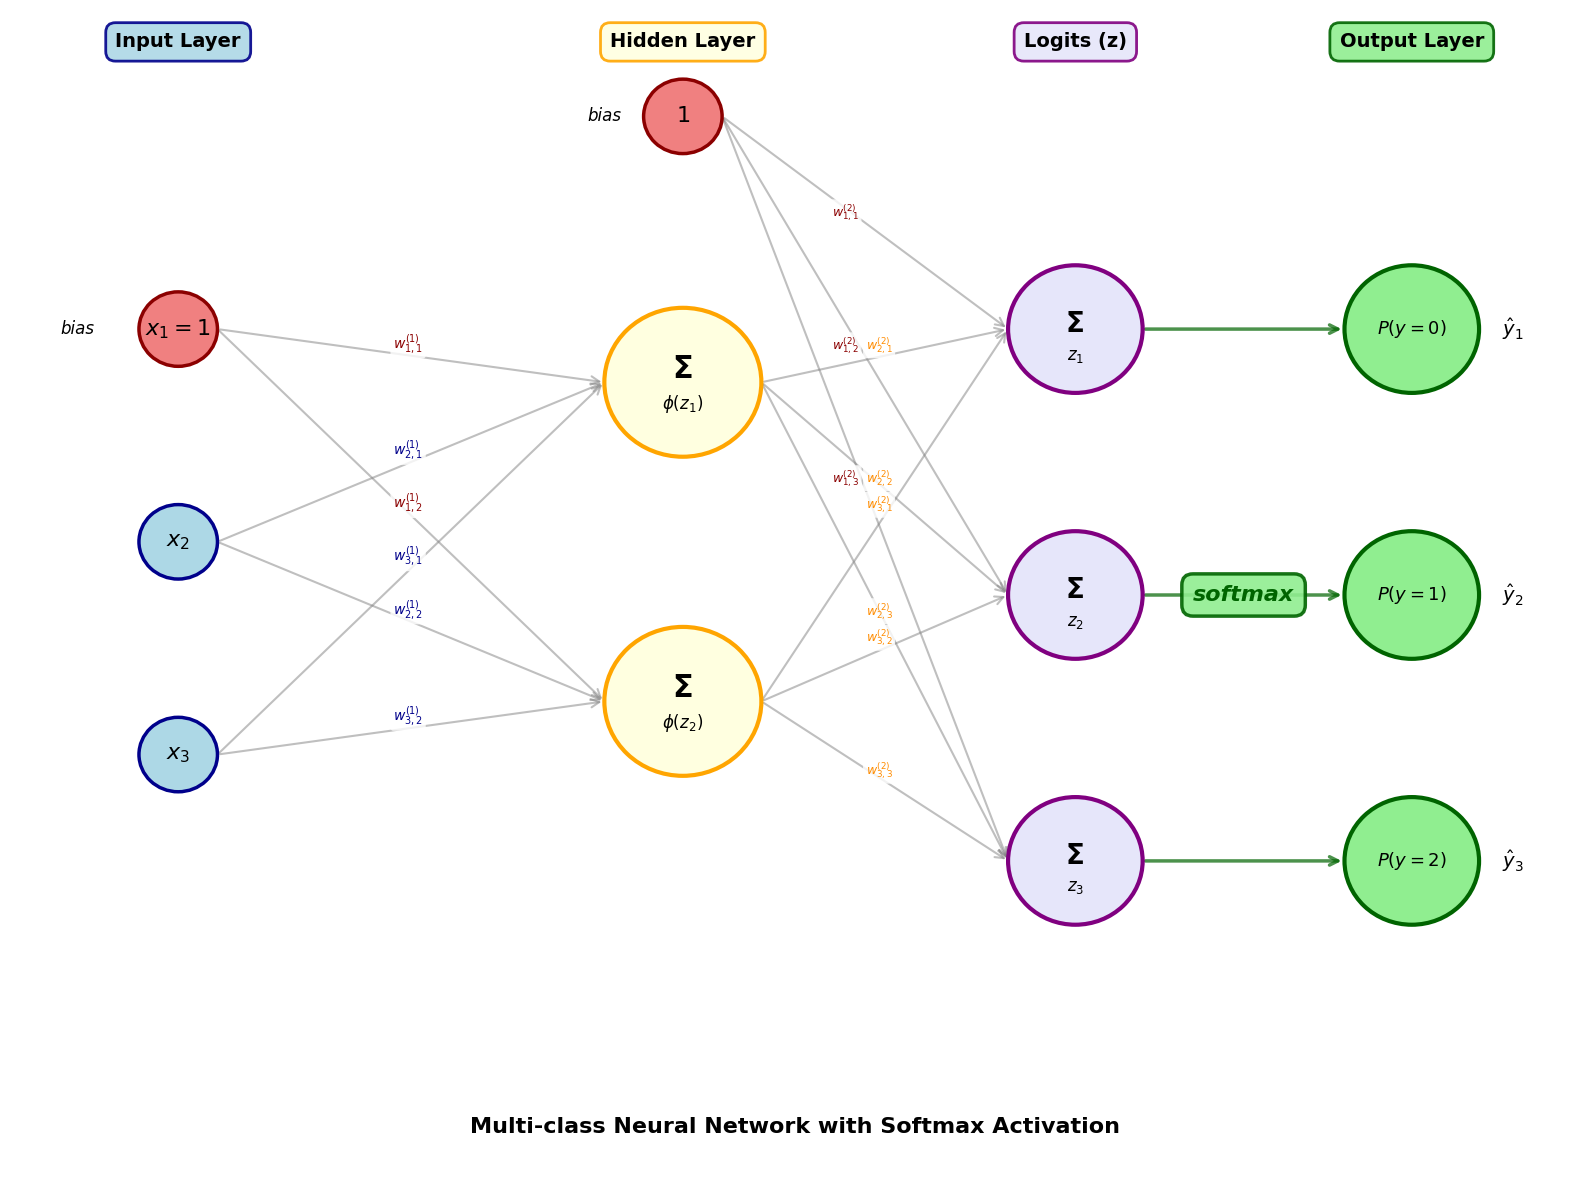

In [ ]:
# Visualize a multi-layer perceptron with softmax output (3 classes)
fig, ax = plt.subplots(figsize=(16, 12))
ax.set_xlim(0, 14)
ax.set_ylim(0, 11)
ax.axis("off")

# Define positions
input_y_positions = [8, 6, 4]  # bias, x1, x2
input_x = 1.5
hidden_x = 6
hidden_y_positions = [7.5, 4.5]  # Two hidden neurons
hidden_bias_y = 10  # Bias for hidden layer
logits_x = 9.5
output_x = 12.5

# 3 output classes
num_classes = 3
output_y_positions = [8, 5.5, 3]  # Three output neurons

# Color scheme
input_color = "lightblue"
input_edge = "darkblue"
bias_color = "lightcoral"
bias_edge = "darkred"
hidden_color = "lightyellow"
hidden_edge = "orange"
logits_color = "lavender"
logits_edge = "purple"
output_color = "lightgreen"
output_edge = "darkgreen"

# Draw input nodes
input_nodes = []
for i, y_pos in enumerate(input_y_positions):
    if i == 0:
        # Bias node
        circle = Circle(
            (input_x, y_pos), 0.35, color=bias_color, ec=bias_edge, linewidth=2.5, zorder=3
        )
        ax.text(
            input_x,
            y_pos,
            "$x_1=1$",
            ha="center",
            va="center",
            fontsize=16,
            fontweight="bold",
            zorder=4,
        )
        ax.text(input_x - 0.9, y_pos, "bias", ha="center", va="center", fontsize=12, style="italic")
    else:
        # Regular input nodes
        circle = Circle(
            (input_x, y_pos), 0.35, color=input_color, ec=input_edge, linewidth=2.5, zorder=3
        )
        ax.text(
            input_x,
            y_pos,
            f"$x_{i + 1}$",
            ha="center",
            va="center",
            fontsize=16,
            fontweight="bold",
            zorder=4,
        )

    ax.add_patch(circle)
    input_nodes.append((input_x, y_pos))

# Draw hidden layer neurons (2 neurons)
hidden_neurons = []
for j, h_y in enumerate(hidden_y_positions):
    hidden_neuron = Circle(
        (hidden_x, h_y), 0.7, color=hidden_color, ec=hidden_edge, linewidth=3, zorder=3
    )
    ax.add_patch(hidden_neuron)
    hidden_neurons.append((hidden_x, h_y))

    # Add sigma symbol and activation function
    ax.text(
        hidden_x,
        h_y + 0.12,
        "Σ",
        ha="center",
        va="center",
        fontsize=22,
        fontweight="bold",
        zorder=4,
    )
    ax.text(
        hidden_x,
        h_y - 0.2,
        f"$\phi(z_{{{j + 1}}})$",
        ha="center",
        va="center",
        fontsize=12,
        style="italic",
        zorder=4,
    )

# Draw bias node for hidden layer (connects to output)
bias_hidden = Circle(
    (hidden_x, hidden_bias_y), 0.35, color=bias_color, ec=bias_edge, linewidth=2.5, zorder=3
)
ax.add_patch(bias_hidden)
ax.text(
    hidden_x,
    hidden_bias_y,
    "$1$",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold",
    zorder=4,
)
ax.text(
    hidden_x - 0.7, hidden_bias_y, "bias", ha="center", va="center", fontsize=12, style="italic"
)

# Draw connections from inputs to BOTH hidden neurons
for j, (h_x, h_y) in enumerate(hidden_neurons):
    for i, (x, y) in enumerate(input_nodes):
        arrow = FancyArrowPatch(
            (x + 0.35, y),
            (h_x - 0.7, h_y),
            arrowstyle="->",
            mutation_scale=15,
            linewidth=1.5,
            color="gray",
            alpha=0.5,
            zorder=1,
        )
        ax.add_patch(arrow)

        # Add weight labels
        mid_x = (x + h_x) / 2 - 0.2
        mid_y = (y + h_y) / 2
        weight_label = f"$w^{{(1)}}_{{{i + 1},{j + 1}}}$"
        ax.text(
            mid_x,
            mid_y,
            weight_label,
            ha="center",
            va="bottom",
            fontsize=10,
            color=bias_edge if i == 0 else input_edge,
            fontweight="bold",
            bbox={
                "boxstyle": "round,pad=0.2",
                "facecolor": "white",
                "edgecolor": "none",
                "alpha": 0.8,
            },
        )

# Draw logits layer (K output neurons before softmax)
logits_neurons = []
for k, out_y in enumerate(output_y_positions):
    logit_neuron = Circle(
        (logits_x, out_y), 0.6, color=logits_color, ec=logits_edge, linewidth=3, zorder=3
    )
    ax.add_patch(logit_neuron)
    logits_neurons.append((logits_x, out_y))

    # Add sigma symbol
    ax.text(
        logits_x,
        out_y + 0.05,
        "Σ",
        ha="center",
        va="center",
        fontsize=20,
        fontweight="bold",
        zorder=4,
    )
    # Add logit label
    ax.text(
        logits_x,
        out_y - 0.25,
        f"$z_{k + 1}$",
        ha="center",
        va="center",
        fontsize=12,
        style="italic",
        zorder=4,
    )

# Draw connections from hidden neurons to ALL logits
for k, (l_x, l_y) in enumerate(logits_neurons):
    for j, (h_x, h_y) in enumerate(hidden_neurons):
        arrow = FancyArrowPatch(
            (h_x + 0.7, h_y),
            (l_x - 0.6, l_y),
            arrowstyle="->",
            mutation_scale=15,
            linewidth=1.5,
            color="gray",
            alpha=0.5,
            zorder=2,
        )
        ax.add_patch(arrow)

        # Add weight labels
        mid_x = (h_x + l_x) / 2
        mid_y = (h_y + l_y) / 2
        ax.text(
            mid_x,
            mid_y,
            f"$w^{{(2)}}_{{{j + 2},{k + 1}}}$",
            ha="center",
            va="bottom",
            fontsize=9,
            color="darkorange",
            fontweight="bold",
            bbox={
                "boxstyle": "round,pad=0.2",
                "facecolor": "white",
                "edgecolor": "none",
                "alpha": 0.8,
            },
        )

# Draw connections from bias to ALL logits
for k, (l_x, l_y) in enumerate(logits_neurons):
    arrow = FancyArrowPatch(
        (hidden_x + 0.35, hidden_bias_y),
        (l_x - 0.6, l_y),
        arrowstyle="->",
        mutation_scale=15,
        linewidth=1.5,
        color="gray",
        alpha=0.5,
        zorder=2,
    )
    ax.add_patch(arrow)

    # Add weight label for bias to logits
    mid_x = (hidden_x + l_x) / 2 - 0.3
    mid_y = (hidden_bias_y + l_y) / 2
    ax.text(
        mid_x,
        mid_y,
        f"$w^{{(2)}}_{{1,{k + 1}}}$",
        ha="center",
        va="bottom",
        fontsize=9,
        color=bias_edge,
        fontweight="bold",
        bbox={"boxstyle": "round,pad=0.2", "facecolor": "white", "edgecolor": "none", "alpha": 0.8},
    )

# Draw softmax output nodes
for k, out_y in enumerate(output_y_positions):
    output_neuron = Circle(
        (output_x, out_y), 0.6, color=output_color, ec=output_edge, linewidth=3, zorder=3
    )
    ax.add_patch(output_neuron)

    # Add probability label
    ax.text(
        output_x,
        out_y,
        f"$P(y={k})$",
        ha="center",
        va="center",
        fontsize=13,
        fontweight="bold",
        zorder=4,
    )

    # Add y-hat label
    ax.text(
        output_x + 0.9,
        out_y,
        f"$\\hat{{y}}_{k + 1}$",
        ha="center",
        va="center",
        fontsize=14,
        fontweight="bold",
    )

# Draw arrows from logits to softmax outputs with softmax label
for k, ((l_x, l_y), (o_x, o_y)) in enumerate(
    zip(logits_neurons, [(output_x, y) for y in output_y_positions])
):
    arrow = FancyArrowPatch(
        (l_x + 0.6, l_y),
        (o_x - 0.6, o_y),
        arrowstyle="->",
        mutation_scale=15,
        linewidth=2.5,
        color="darkgreen",
        alpha=0.7,
        zorder=2,
    )
    ax.add_patch(arrow)

# Add softmax label in the middle
softmax_x = (logits_x + output_x) / 2
softmax_y = (max(output_y_positions) + min(output_y_positions)) / 2
ax.text(
    softmax_x,
    softmax_y,
    "softmax",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold",
    style="italic",
    color="darkgreen",
    bbox={
        "boxstyle": "round,pad=0.5",
        "facecolor": "lightgreen",
        "edgecolor": "darkgreen",
        "linewidth": 2.5,
        "alpha": 0.9,
    },
)

# Add layer labels
layer_label_y = 10.7
ax.text(
    input_x,
    layer_label_y,
    "Input Layer",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    bbox={
        "boxstyle": "round,pad=0.5",
        "facecolor": "lightblue",
        "edgecolor": "darkblue",
        "linewidth": 2,
        "alpha": 0.9,
    },
)
ax.text(
    hidden_x,
    layer_label_y,
    "Hidden Layer",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    bbox={
        "boxstyle": "round,pad=0.5",
        "facecolor": "lightyellow",
        "edgecolor": "orange",
        "linewidth": 2,
        "alpha": 0.9,
    },
)
ax.text(
    logits_x,
    layer_label_y,
    "Logits (z)",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    bbox={
        "boxstyle": "round,pad=0.5",
        "facecolor": "lavender",
        "edgecolor": "purple",
        "linewidth": 2,
        "alpha": 0.9,
    },
)
ax.text(
    output_x,
    layer_label_y,
    "Output Layer",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    bbox={
        "boxstyle": "round,pad=0.5",
        "facecolor": "lightgreen",
        "edgecolor": "darkgreen",
        "linewidth": 2,
        "alpha": 0.9,
    },
)

# Add title
ax.text(
    7,
    0.5,
    "Multi-class Neural Network with Softmax Activation",
    ha="center",
    va="center",
    fontsize=16,
    fontweight="bold",
)

plt.tight_layout()
plt.show()

## Implicaties voor gradiëntberekening

De softmax activatiefunctie heeft belangrijke gevolgen voor de {ref}`backward pass <target-back-propagation>` tijdens het trainen van het netwerk:

### Gekoppelde outputs
In tegenstelling tot de logistische activatiefunctie, waarbij elk neuron onafhankelijk geactiveerd wordt, zijn de softmax outputs **onderling afhankelijk**. De output van één neuron beïnvloedt alle andere outputs door de normalisatie. Dit betekent dat bij het berekenen van de gradiënt met betrekking tot een bepaald $z_k$, **alle** softmax outputs een rol spelen.

### Partiële afgeleiden
Voor de partiële afgeleide van softmax output $i$ naar {ref}`logit <target-logits>` $j$ geldt:

$$
\frac{\partial \text{softmax}(\mathbf{z})_i}{\partial z_j} = 
\begin{cases}
\text{softmax}(\mathbf{z})_i(1 - \text{softmax}(\mathbf{z})_i) & \text{als } i = j \\
-\text{softmax}(\mathbf{z})_i \cdot \text{softmax}(\mathbf{z})_j & \text{als } i \neq j
\end{cases}
$$

Deze formule toont dat:
- De diagonale termen ($i=j$) lijken op de afgeleide van de logistische functie: $\sigma(z)(1-\sigma(z))$
- De off-diagonale termen ($i \neq j$) zijn negatief en koppelen verschillende outputs aan elkaar

### Cross-entropy loss
In de praktijk wordt softmax bijna altijd gecombineerd met de **categorical cross-entropy** loss functie:

$$
\mathcal{L}_{CE} = -\sum_{k=1}^{K} y_k \log(\text{softmax}(\mathbf{z})_k)
$$

waarbij $y_k$ de _one-hot encoded_ target is (dus $y_k = 1$ voor de juiste klasse en $y_k = 0$ voor alle andere klassen).

Een elegante eigenschap van deze combinatie is dat de gradiënt van de loss naar de logits **zeer eenvoudig** wordt:

$$
\frac{\partial \mathcal{L}_{CE}}{\partial z_k} = \text{softmax}(\mathbf{z})_k - y_k
$$

Dit is de voorspelde kans minus de werkelijke target. Deze eenvoudige vorm maakt de backward pass efficiënt en numeriek stabiel, ondanks de complexiteit van de softmax functie zelf.